In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_names = [
    'holidays_events', 'items', 'stores', 'train',
    'test', 'sample_submission', 'oil', 'transactions'
]

In [3]:
# to_pop = ['holidays_events', 'stores']
# to_pop = df_names 
# to_pop = ['train']
to_pop = [] 

for name in to_pop:
    popped = globals().pop(name, None)
    if popped is not None:
        print(f"Removed variable: {name}")

In [4]:
df_array = []

for name in df_names:
    if name not in globals():
        path = f'./data_favorita/{name}.csv'
        globals()[name] = pd.read_csv(path)
        print(f"{name} loaded from {path}")
    else:
        print(f"{name} already in memory, skipping...")
    
    df_array.append(globals()[name])

holidays_events, items, stores, train, test, sample_submission, oil, transactions = df_array

holidays_events loaded from ./data_favorita/holidays_events.csv
items loaded from ./data_favorita/items.csv
stores loaded from ./data_favorita/stores.csv


C:\Users\mcgre\AppData\Local\Temp\ipykernel_940\2897630543.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[name] = pd.read_csv(path)


train loaded from ./data_favorita/train.csv
test loaded from ./data_favorita/test.csv
sample_submission loaded from ./data_favorita/sample_submission.csv
oil loaded from ./data_favorita/oil.csv
transactions loaded from ./data_favorita/transactions.csv


In [5]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## Funkcje

In [6]:
def plot_time_series(df, date_col, value_col, step=1):
    df = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(date_col)

    df_sampled = df.iloc[::step, :]

    plt.figure(figsize=(14, 6))
    plt.plot(df_sampled[date_col], df_sampled[value_col], marker='', linestyle='-')
    plt.title(f"{value_col} over time", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel(value_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
def get_percentage_missing(df, axis):
  """
    Zwraca procent brakujących wartości (NaN) w wierszach lub kolumnach DataFrame.

    df : pandas.DataFrame
        Tabela danych, dla której liczone są braki.

    axis : int
        Oś, względem której obliczane są braki:
        - 0 : procent braków w każdej kolumnie
        - 1 : procent braków w każdym wierszu
  """
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows / df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

In [8]:
def plot_distribution(df, column):
    plt.figure(figsize=(12, 6))

    if df[column].dtype == 'bool':
        sns.countplot(data=df, x=column)
        plt.ylabel("Count")

    elif df[column].dtype == 'object' or df[column].dtype.name == 'category':
        sns.countplot(data=df, x=column)
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Count")

    else:
        sns.histplot(data=df, x=column, bins=30, kde=True)
        plt.ylabel("Frequency")

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

In [9]:
def plot_heatmap(df, corr=True, figsize=(12,6), cmap="coolwarm", annot=True):
    """
    Rysuje heatmapę na podstawie dataframe.

    Parametry
    ---------
    df : pd.DataFrame
        Dane wejściowe (musi zawierać wartości numeryczne).
    corr : bool, default=True
        Jeśli True -> rysuje macierz korelacji df.corr().
        Jeśli False -> rysuje bezpośrednio wartości df (np. pivot).
    figsize : tuple, default=(12,8)
        Rozmiar wykresu.
    cmap : str, default="coolwarm"
        Paleta kolorów (np. "viridis", "YlGnBu", "magma").
    annot : bool, default=True
        Czy wyświetlić wartości liczbowo w komórkach.
    """
    
    plt.figure(figsize=figsize)

    # wybór danych
    data = df.corr(numeric_only=True) if corr else df

    sns.heatmap(data, annot=annot, cmap=cmap, fmt=".2f", linewidths=0.5)
    plt.title("Heatmapa" + (" korelacji" if corr else ""), fontsize=14)
    plt.show()

In [10]:
def plot_boxplots(df, columns, sample_step=1):
    """
    Rysuje wykresy pudełkowe (boxplot) dla podanych kolumn DataFrame.

    Parametry
    ---------
    df : pd.DataFrame
        Dane wejściowe.
    columns : list of str
        Lista nazw kolumn do narysowania boxplotów.
    sample_step : int, default=1
        Krok próbkowania danych (np. 10 oznacza co 10-ty wiersz).
    """
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df.iloc[::sample_step], y=col)
        plt.title(f"Boxplot of {col}", fontsize=14)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

In [11]:
def get_column_distribution(df, column):
  return df[column].value_counts(normalize=True).round(4)

In [12]:
def get_missing_summary(df):
    missing_summary = {
        "missing_per_column": df.isna().any(axis=0).sum().__int__(),
        "missing_perc_column": np.round(df.isna().any(axis=0).mean() * 100, 2).__float__(),
        "rows_with_missing": df.isna().any(axis=1).sum().__int__()
    }
    return missing_summary

## ogólnie

In [12]:
col = 'date'
for i, df in enumerate(df_array):
    if col in df.columns:
        print(df_names[i], end="\n")
        print(df[col].min(), df[col].max(), sep="\t", end="\n\n")

holidays_events
2012-03-02	2017-12-26

train
2013-01-01	2017-08-15

test
2017-08-16	2017-08-31

oil
2013-01-01	2017-08-31

transactions
2013-01-01	2017-08-15



In [13]:
for i, df in enumerate(df_array):
    print(df_names[i])
    print(df.head())

holidays_events
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
items
   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1
stores
   store_nbr           city                           state type  cluster
0          1          Quito                       

## train i test

train.csv

- Training data, which includes the target unit_sales by date, store_nbr, and item_nbr and a unique id to label rows.
- The target unit_sales can be integer (e.g., a bag of chips) or float (e.g., 1.5 kg of cheese).
- Negative values of unit_sales represent returns of that particular item.
- The onpromotion column tells whether that item_nbr was on promotion for a specified date and store_nbr.
- Approximately 16% of the onpromotion values in this file are NaN.
- NOTE: The training data does not include rows for items that had zero unit_sales for a store/date combination. There is no information as to whether or not the item was in stock for the store on the date, and teams will need to decide the best way to handle that situation. Also, there are a small number of items seen in the training data that aren't seen in the test data.

test.csv

- Test data, with the date, store_nbr, item_nbr combinations that are to be predicted, along with the onpromotion information.
- NOTE: The test data has a small number of items that are not contained in the training data. Part of the exercise will be to predict a new item sales based on similar products..


In [14]:
train.head(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
5,5,2013-01-01,25,108786,3.0,NaN
6,6,2013-01-01,25,108797,1.0,NaN
7,7,2013-01-01,25,108952,1.0,NaN
8,8,2013-01-01,25,111397,13.0,NaN
9,9,2013-01-01,25,114790,3.0,NaN


In [15]:
train.tail(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
125497030,125497030,2017-08-15,54,2086882,1.0,False
125497031,125497031,2017-08-15,54,2087409,3.0,False
125497032,125497032,2017-08-15,54,2087978,8.0,False
125497033,125497033,2017-08-15,54,2088922,7.0,False
125497034,125497034,2017-08-15,54,2089036,4.0,False
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True
125497039,125497039,2017-08-15,54,2116416,2.0,False


In [16]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [17]:
test.tail()

,id,date,store_nbr,item_nbr,onpromotion
3370459,128867499,2017-08-31,54,2132163,False
3370460,128867500,2017-08-31,54,2132318,False
3370461,128867501,2017-08-31,54,2132945,False
3370462,128867502,2017-08-31,54,2132957,False
3370463,128867503,2017-08-31,54,2134244,False


In [18]:
train.describe()

,id,store_nbr,item_nbr,unit_sales
count,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08
mean,6.274852e+07,2.746458e+01,9.727692e+05,8.554865e+00
std,3.622788e+07,1.633051e+01,5.205336e+05,2.360515e+01
min,0.000000e+00,1.000000e+00,9.699500e+04,-1.537200e+04
25%,3.137426e+07,1.200000e+01,5.223830e+05,2.000000e+00
50%,6.274852e+07,2.800000e+01,9.595000e+05,4.000000e+00
75%,9.412278e+07,4.300000e+01,1.354380e+06,9.000000e+00
max,1.254970e+08,5.400000e+01,2.127114e+06,8.944000e+04


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ GB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370464 entries, 0 to 3370463
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   id           int64 
 1   date         object
 2   store_nbr    int64 
 3   item_nbr     int64 
 4   onpromotion  bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 106.1+ MB


In [21]:
# for col in train.columns:
#     print(col, train[col].unique(), sep='\n', end="\n\n")

In [22]:
train.isna().sum()

id                    0
date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion    21657651
dtype: int64

In [23]:
test.isna().sum()

id             0
date           0
store_nbr      0
item_nbr       0
onpromotion    0
dtype: int64

In [24]:
get_missing_summary(train)

{'missing_per_column': 1,
 'missing_perc_column': 16.67,
 'rows_with_missing': 21657651}

Jedynie On promotion w train zawiera braki

In [25]:
get_percentage_missing(train, axis=0)

KeyboardInterrupt: 

In [ ]:
train.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')

In [ ]:
get_column_distribution(train, 'onpromotion')

onpromotion
False    0.9248
True     0.0752
Name: proportion, dtype: float64

In [ ]:
get_column_distribution(test, 'onpromotion')

onpromotion
False    0.9411
True     0.0589
Name: proportion, dtype: float64

In [ ]:
train_cpy = train.copy()

In [ ]:
train['onpromotion'] = train['onpromotion'].fillna('No data')

In [ ]:
get_column_distribution(train, 'onpromotion')

onpromotion
False      0.7652
No data    0.1726
True       0.0622
Name: proportion, dtype: float64

In [ ]:
onpromotion_mapping = {True: 2, 'No data': 1, False: 0}
train['onpromotion'] = train['onpromotion'].map(onpromotion_mapping)
train['onpromotion'].unique()

array([1, 0, 2])

In [ ]:
get_column_distribution(train, 'onpromotion')

onpromotion
0    0.7652
1    0.1726
2    0.0622
Name: proportion, dtype: float64

In [ ]:
train['date'] = pd.to_datetime(train['date'])

In [ ]:
train.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
item_nbr                int64
unit_sales            float64
onpromotion             int64
dtype: object

wykresy train

In [ ]:
def date_on_promotion_distribution(date_on_promotion):
    plt.figure(figsize=(10, 5))
    sns.histplot(date_on_promotion, bins=100)
    plt.title('Distribution of promotion dates in training dataset')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

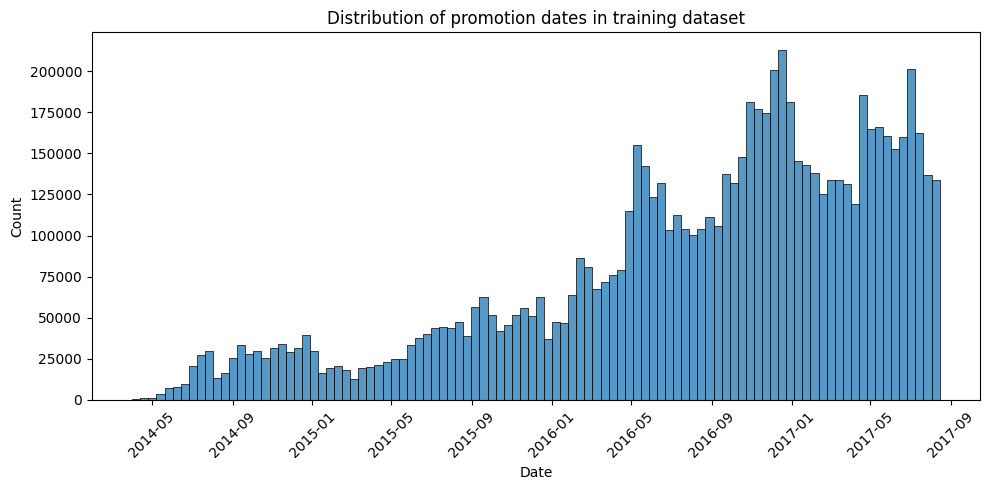

In [ ]:
date_on_promotion = train.loc[train['onpromotion'] == onpromotion_mapping[True], 'date']
date_on_promotion_distribution(date_on_promotion)

Z czasem pojawiało się więcej promocji

In [ ]:
def date_on_promotion_year(date_on_promotion, year):
    start_date = f'{year}-01-01'
    end_date = f'{year + 1}-01-01'
    date_on_promotion_year = date_on_promotion[(date_on_promotion >= start_date) & (date_on_promotion < end_date)]
    date_on_promotion_distribution(date_on_promotion_year)

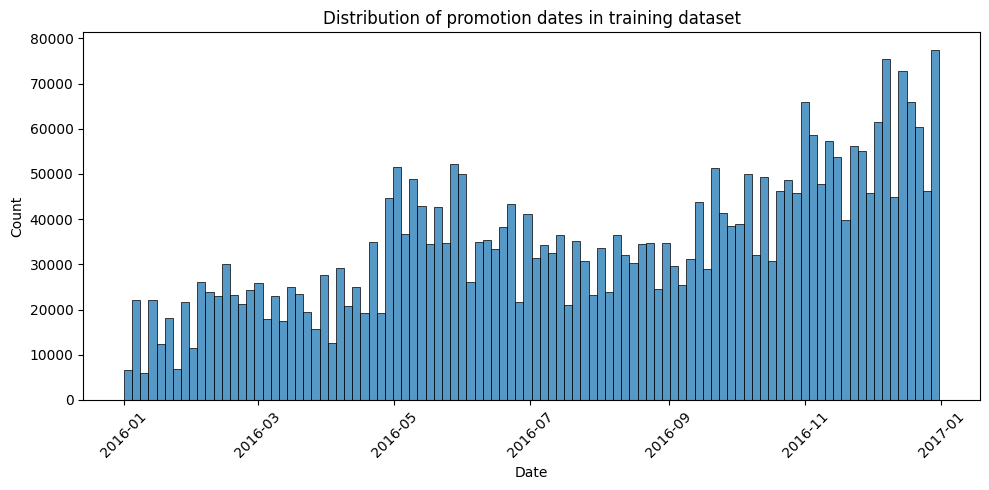

In [ ]:
date_on_promotion_year(date_on_promotion, 2016)

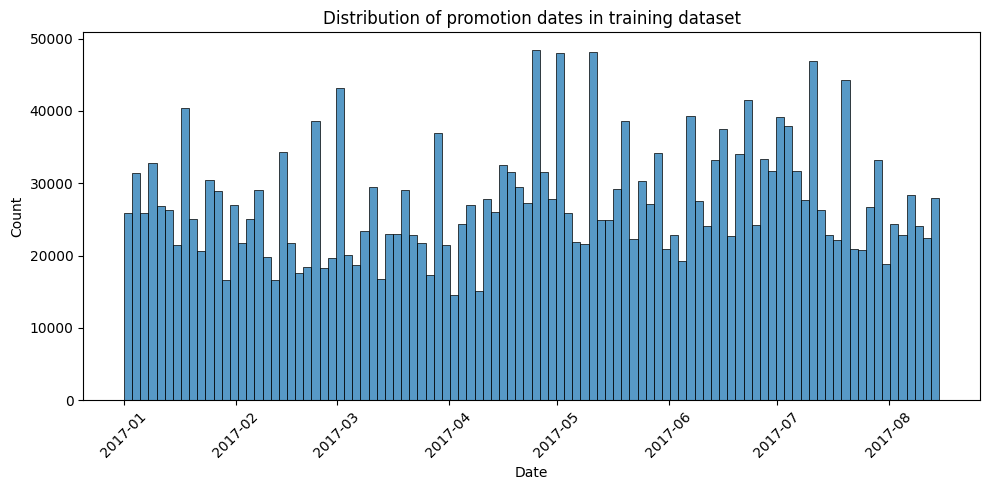

In [ ]:
date_on_promotion_year(date_on_promotion, 2017)

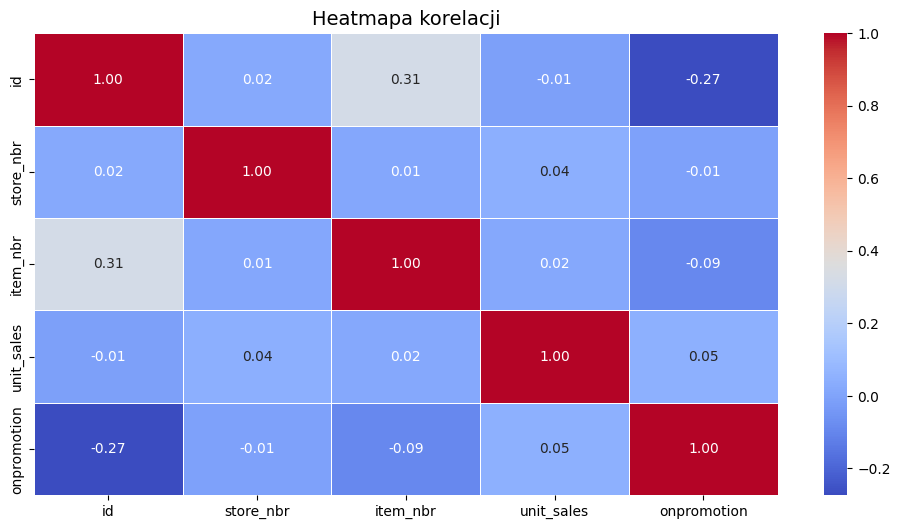

In [ ]:
plot_heatmap(train)

unit sales niestety ma niewielką korelacje z danymi w tej tabeli
można zauważyć, że item number zależy od id, a więc jest to również pewnego rodzaju identyfikator

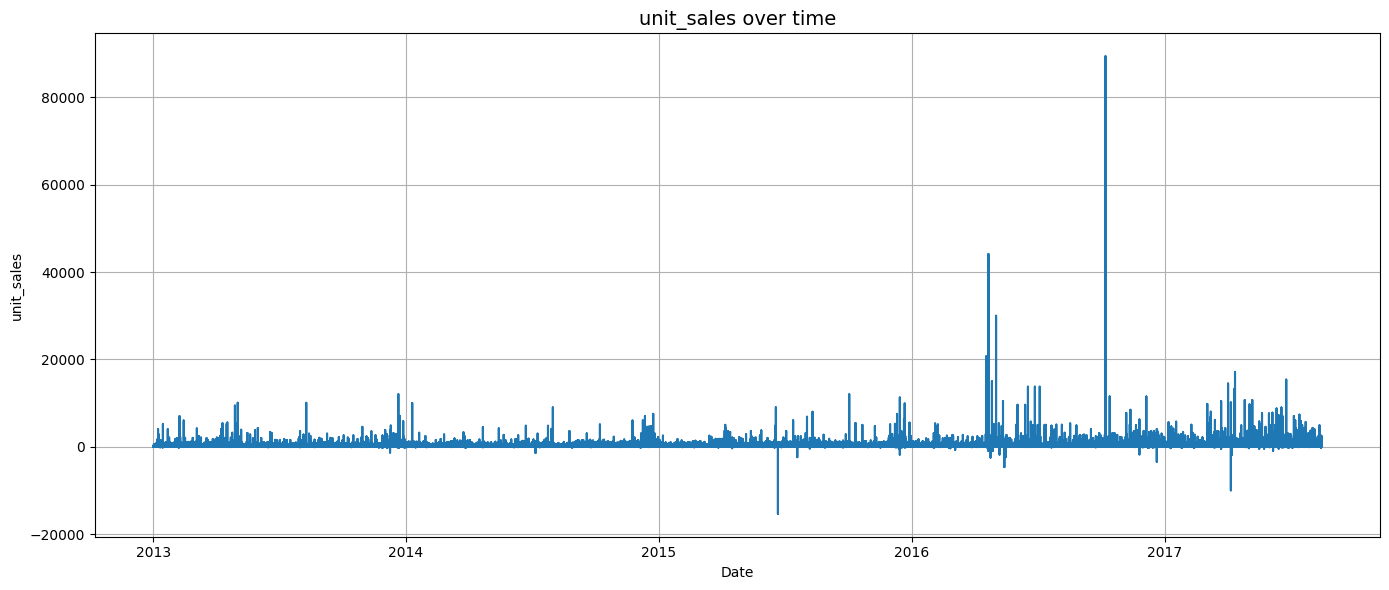

In [ ]:
plot_time_series(train, 'date', 'unit_sales')

In [ ]:
train['onpromotion'].value_counts()

onpromotion
0    96028767
1    21657651
2     7810622
Name: count, dtype: int64

In [ ]:
# train[train['unit_sales'] == 89440.0]

In [ ]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays_events.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [ ]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

In [ ]:
df = pd.merge(train, holidays_events, on='date', how='left')
# df[df['unit_sales'] == 89440.0]

MemoryError: Unable to allocate 4.77 GiB for an array with shape (5, 127970257) and data type object

In [ ]:
train['unit_sales'].max()


np.float64(89440.0)

In [ ]:
train.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')

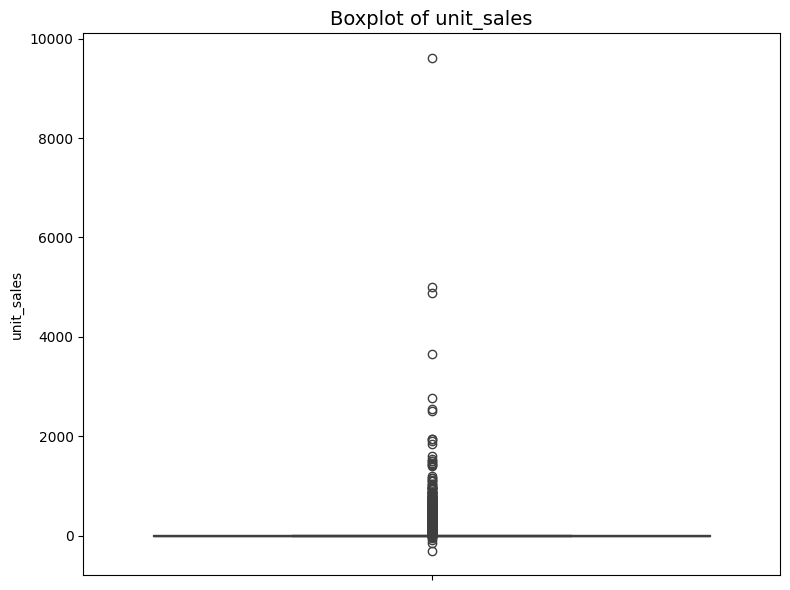

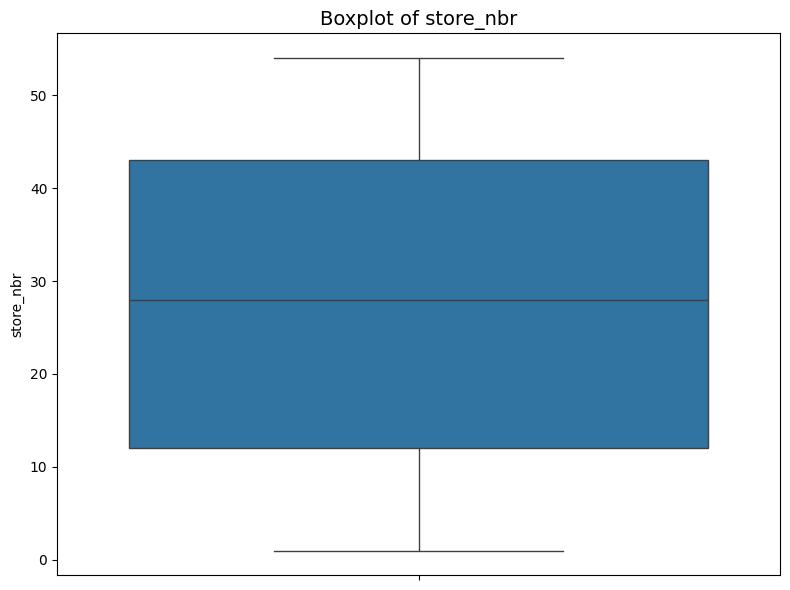

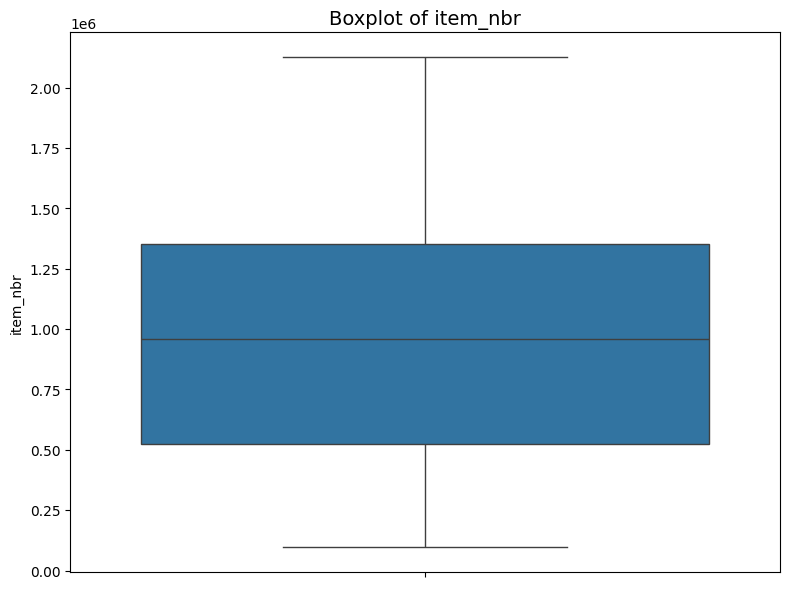

In [ ]:
plot_boxplots(train, ['unit_sales', 'store_nbr', 'item_nbr'], sample_step=100)

unit sales zawiera mnówstwo outlierów

## holidays events



In [ ]:
holidays_events.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [ ]:
holidays_events.tail(10)

,date,type,locale,locale_name,description,transferred
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,True
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,False
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,False
343,2017-12-21,Additional,National,Ecuador,Navidad-4,False
344,2017-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [ ]:
holidays_events.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


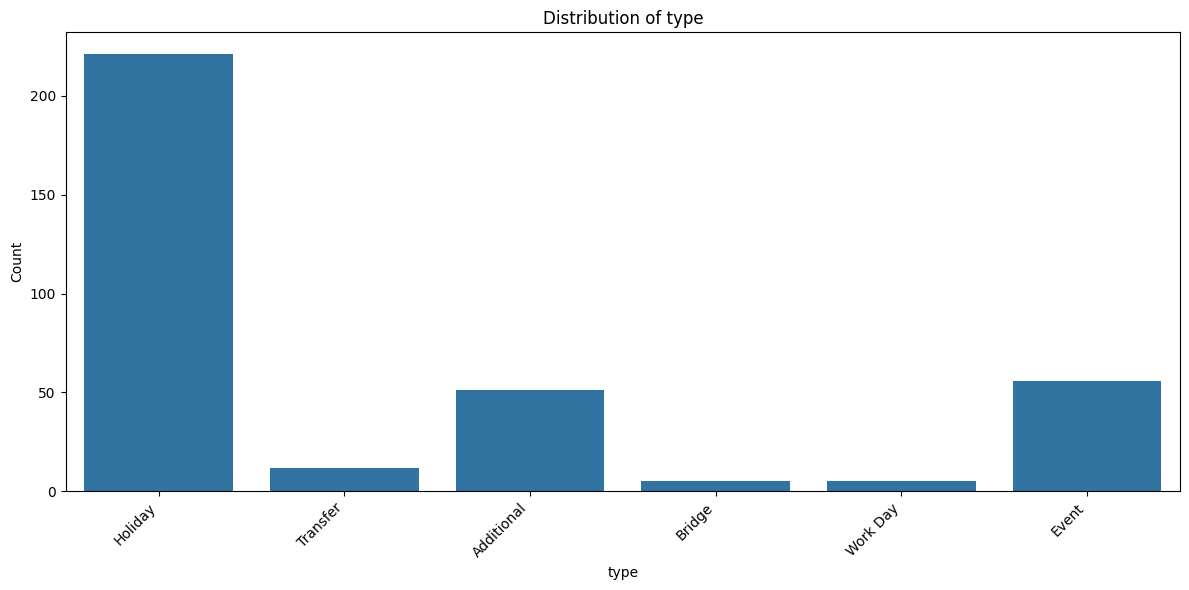

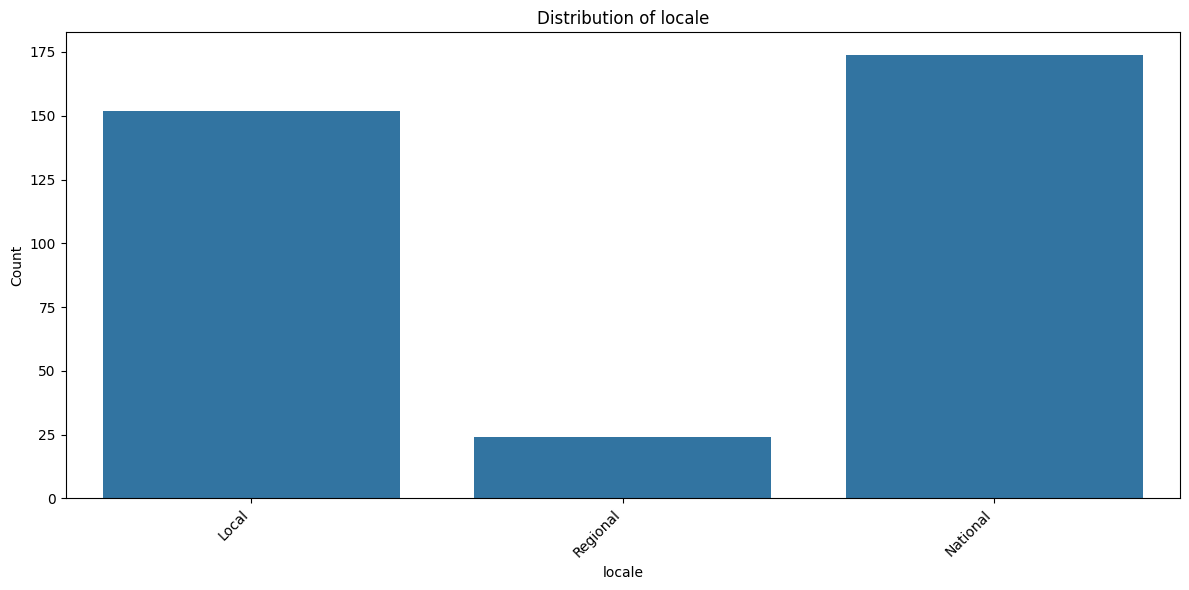

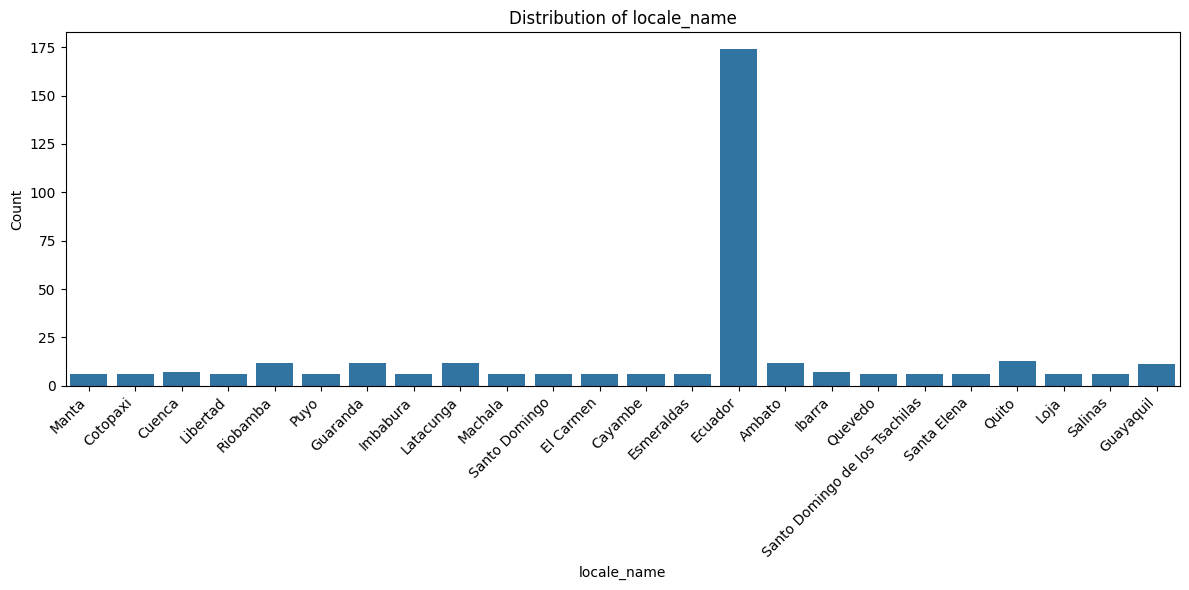

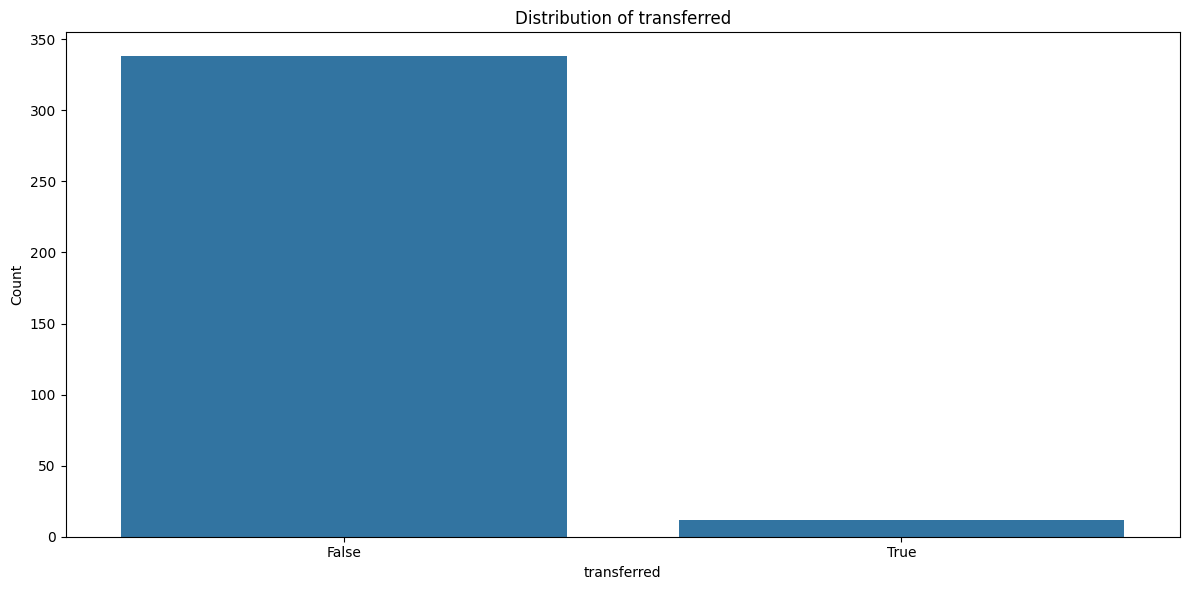

In [ ]:
for col in ['type', 'locale', 'locale_name', 'transferred']:
    plot_distribution(holidays_events, col)

1. Najwięcej jest zwykłych holidays, mniej specjalnych (przeniesień, przedłużeń)
2. Główne dni wolne są narodowe lub lokalne, najmniej regionalne
3. Zdecydowaną większość holidays posiada lokal Ecuador

In [ ]:
holidays_events['locale_name'].value_counts()

locale_name
Ecuador                           174
Quito                              13
Guaranda                           12
Riobamba                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Imbabura                            6
Cotopaxi                            6
Libertad                            6
Manta                               6
Puyo                                6
El Carmen                           6
Machala                             6
Cayambe                             6
Esmeraldas                          6
Santo Domingo                       6
Quevedo                             6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Loja                                6
Salinas                             6
Name: count, dtype: int64

In [ ]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [ ]:
transferred_to = holidays_events[holidays_events['transferred'] == True]
transferred_to

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


święta które zostały przeniesione

In [ ]:
transferred_from = holidays_events[holidays_events['type'] == 'Transfer']
transferred_from

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


In [ ]:
holidays_events[holidays_events['type'] == 'Bridge']

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


Przedłużenia weekendu

In [ ]:
holidays_events[holidays_events['type'] == 'Work Day']

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


Nadrobienie przedłużeń

In [ ]:
holidays = holidays_events.copy()

In [ ]:
holidays_events = pd.get_dummies(holidays_events, columns=['type', 'locale'])
holidays_events.drop(['locale_name', 'description'], axis=1, inplace=True)
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             350 non-null    datetime64[ns]
 1   transferred      350 non-null    bool          
 2   type_Additional  350 non-null    bool          
 3   type_Bridge      350 non-null    bool          
 4   type_Event       350 non-null    bool          
 5   type_Holiday     350 non-null    bool          
 6   type_Transfer    350 non-null    bool          
 7   type_Work Day    350 non-null    bool          
 8   locale_Local     350 non-null    bool          
 9   locale_National  350 non-null    bool          
 10  locale_Regional  350 non-null    bool          
dtypes: bool(10), datetime64[ns](1)
memory usage: 6.3 KB


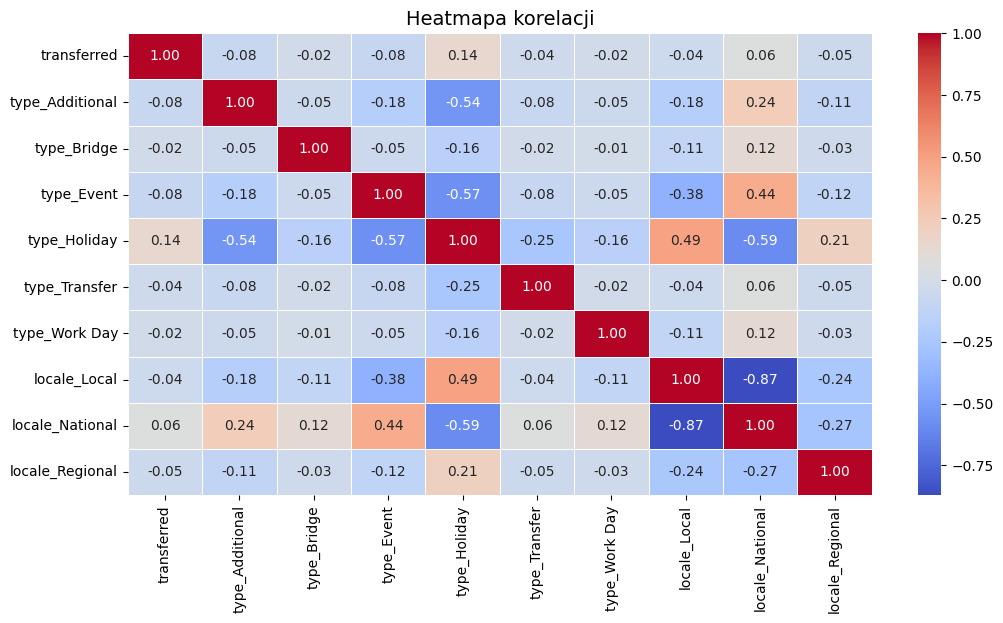

In [ ]:
plot_heatmap(holidays_events)

## items


In [ ]:
items.head(10)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


In [ ]:
items.tail(10)

,item_nbr,family,class,perishable
4090,2130553,"LIQUOR,WINE,BEER",1318,0
4091,2131010,"LIQUOR,WINE,BEER",1328,0
4092,2131572,GROCERY I,1002,0
4093,2131699,GROCERY I,1002,0
4094,2132163,GROCERY I,1040,0
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0
4099,2134244,"LIQUOR,WINE,BEER",1364,0


In [ ]:
items.describe()

,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB


In [ ]:
items['perishable'].value_counts()  

perishable
0    3114
1     986
Name: count, dtype: int64

In [ ]:
get_column_distribution(items, 'perishable')

perishable
0    0.7595
1    0.2405
Name: proportion, dtype: float64

Przedmioty łatwo psujące się są mniejszością

In [ ]:
get_column_distribution(items, 'family')

family
GROCERY I                     0.3254
BEVERAGES                     0.1495
CLEANING                      0.1088
PRODUCE                       0.0746
DAIRY                         0.0590
PERSONAL CARE                 0.0373
BREAD/BAKERY                  0.0327
HOME CARE                     0.0263
DELI                          0.0222
MEATS                         0.0205
HOME AND KITCHEN I            0.0188
LIQUOR,WINE,BEER              0.0178
FROZEN FOODS                  0.0134
POULTRY                       0.0132
HOME AND KITCHEN II           0.0110
EGGS                          0.0100
CELEBRATION                   0.0076
LAWN AND GARDEN               0.0063
PREPARED FOODS                0.0063
LADIESWEAR                    0.0051
LINGERIE                      0.0049
AUTOMOTIVE                    0.0049
BEAUTY                        0.0046
PLAYERS AND ELECTRONICS       0.0041
SCHOOL AND OFFICE SUPPLIES    0.0037
GROCERY II                    0.0034
PET SUPPLIES                  0

top3: GROCERY I, BEVERAGES, CLEANING

In [ ]:
items_cpy = items.copy()

In [ ]:
items = items.drop(['family'], axis=1)
items.head()

,item_nbr,class,perishable
0,96995,1093,0
1,99197,1067,0
2,103501,3008,0
3,103520,1028,0
4,103665,2712,1


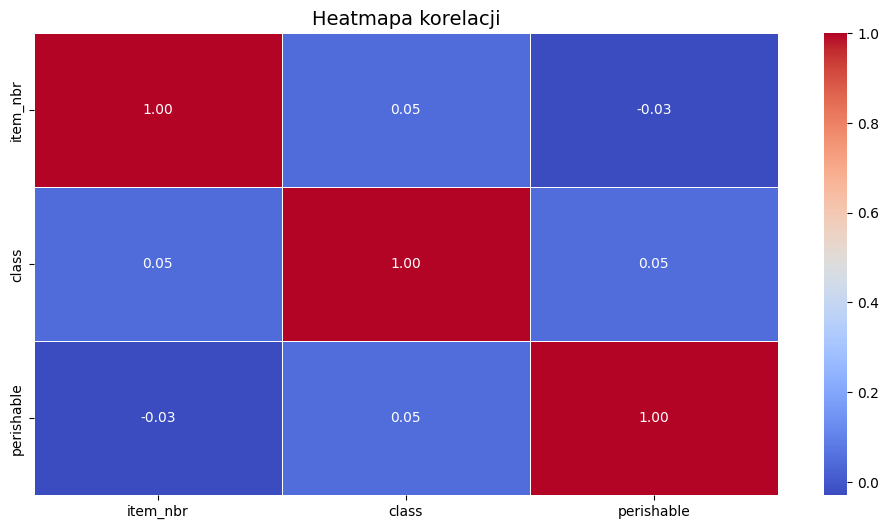

In [ ]:
plot_heatmap(items)

nic ciekawego

## stores

In [ ]:
stores.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [27]:
print(stores.tail(10))

    store_nbr       city       state type  cluster
44         45      Quito   Pichincha    A       11
45         46      Quito   Pichincha    A       14
46         47      Quito   Pichincha    A       14
47         48      Quito   Pichincha    A       14
48         49      Quito   Pichincha    A       11
49         50     Ambato  Tungurahua    A       14
50         51  Guayaquil      Guayas    A       17
51         52      Manta      Manabi    A       11
52         53      Manta      Manabi    D       13
53         54  El Carmen      Manabi    C        3


In [ ]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


54 sklepy

In [ ]:
stores.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [28]:
stores[['city', 'state']].value_counts()

city           state                         
Quito          Pichincha                         18
Guayaquil      Guayas                             8
Cuenca         Azuay                              3
Santo Domingo  Santo Domingo de los Tsachilas     3
Latacunga      Cotopaxi                           2
Ambato         Tungurahua                         2
Machala        El Oro                             2
Manta          Manabi                             2
Cayambe        Pichincha                          1
Babahoyo       Los Rios                           1
El Carmen      Manabi                             1
Daule          Guayas                             1
Ibarra         Imbabura                           1
Esmeraldas     Esmeraldas                         1
Loja           Loja                               1
Libertad       Guayas                             1
Guaranda       Bolivar                            1
Playas         Guayas                             1
Quevedo        Los

In [30]:
print(items.head(10))
print(items.tail(10))

   item_nbr        family  class  perishable
0     96995     GROCERY I   1093           0
1     99197     GROCERY I   1067           0
2    103501      CLEANING   3008           0
3    103520     GROCERY I   1028           0
4    103665  BREAD/BAKERY   2712           1
5    105574     GROCERY I   1045           0
6    105575     GROCERY I   1045           0
7    105576     GROCERY I   1045           0
8    105577     GROCERY I   1045           0
9    105693     GROCERY I   1034           0
      item_nbr            family  class  perishable
4090   2130553  LIQUOR,WINE,BEER   1318           0
4091   2131010  LIQUOR,WINE,BEER   1328           0
4092   2131572         GROCERY I   1002           0
4093   2131699         GROCERY I   1002           0
4094   2132163         GROCERY I   1040           0
4095   2132318         GROCERY I   1002           0
4096   2132945         GROCERY I   1026           0
4097   2132957         GROCERY I   1068           0
4098   2134058         BEVERAGES   11

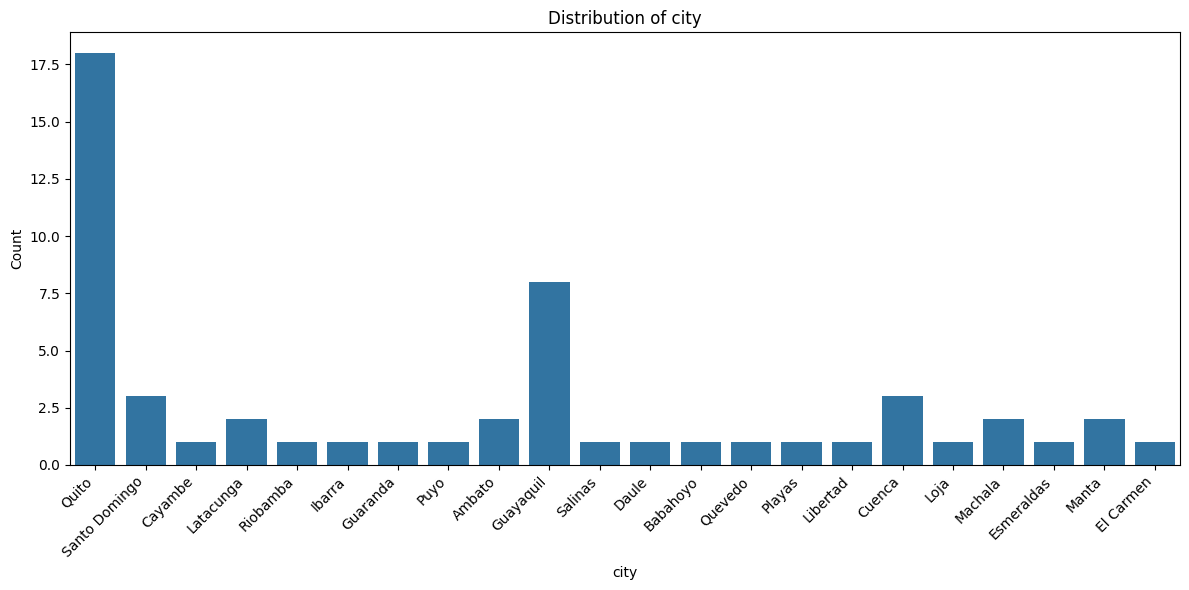

In [ ]:
plot_distribution(stores, 'city')

Najwięcej sklepów w: Quito, Guayaquil, Cuenca

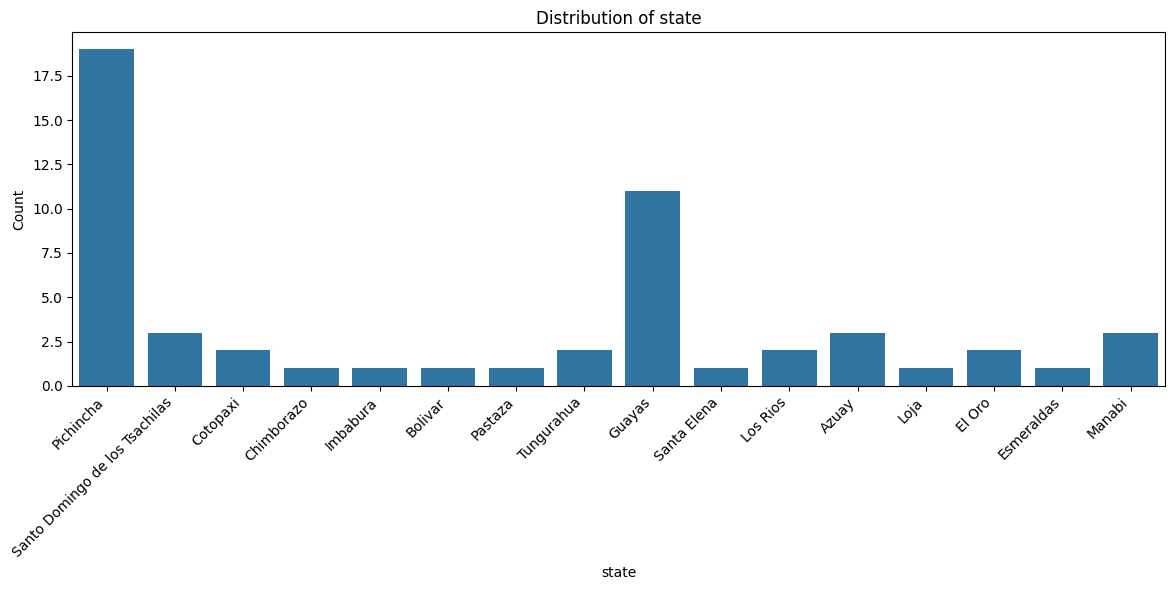

In [ ]:
plot_distribution(stores, 'state')

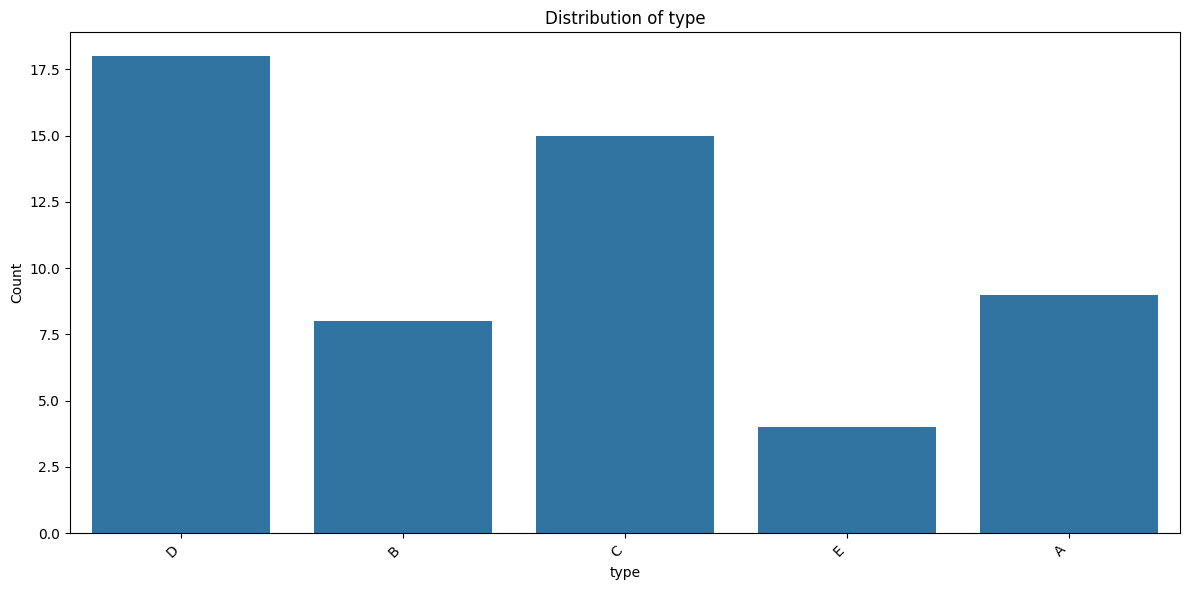

In [ ]:
plot_distribution(stores, 'type')

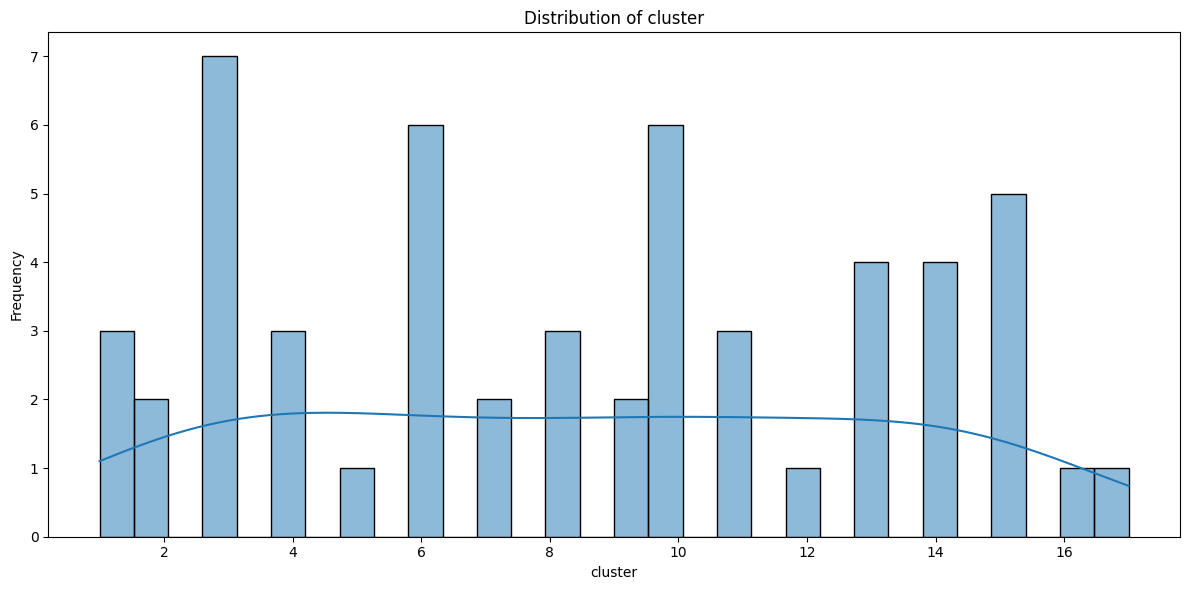

In [ ]:
plot_distribution(stores, 'cluster')

In [ ]:
stores_cpy = stores.copy()

for col in ['city', 'state']:
    counts = stores[col].value_counts()
    stores[col] = stores[col].where(stores[col].isin(counts[counts > 3].index), "Other")
    print(stores[col].value_counts())
    print()

city
Other        28
Quito        18
Guayaquil     8
Name: count, dtype: int64

state
Other        24
Pichincha    19
Guayas       11
Name: count, dtype: int64



In [ ]:
stores = pd.get_dummies(stores, columns=['type', 'city', 'state'])
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   store_nbr        54 non-null     int64
 1   cluster          54 non-null     int64
 2   type_A           54 non-null     bool 
 3   type_B           54 non-null     bool 
 4   type_C           54 non-null     bool 
 5   type_D           54 non-null     bool 
 6   type_E           54 non-null     bool 
 7   city_Guayaquil   54 non-null     bool 
 8   city_Other       54 non-null     bool 
 9   city_Quito       54 non-null     bool 
 10  state_Guayas     54 non-null     bool 
 11  state_Other      54 non-null     bool 
 12  state_Pichincha  54 non-null     bool 
dtypes: bool(11), int64(2)
memory usage: 1.6 KB


In [ ]:
stores.head()

,store_nbr,cluster,type_A,type_B,type_C,type_D,type_E,city_Guayaquil,city_Other,city_Quito,state_Guayas,state_Other,state_Pichincha
0,1,13,False,False,False,True,False,False,False,True,False,False,True
1,2,13,False,False,False,True,False,False,False,True,False,False,True
2,3,8,False,False,False,True,False,False,False,True,False,False,True
3,4,9,False,False,False,True,False,False,False,True,False,False,True
4,5,4,False,False,False,True,False,False,True,False,False,True,False


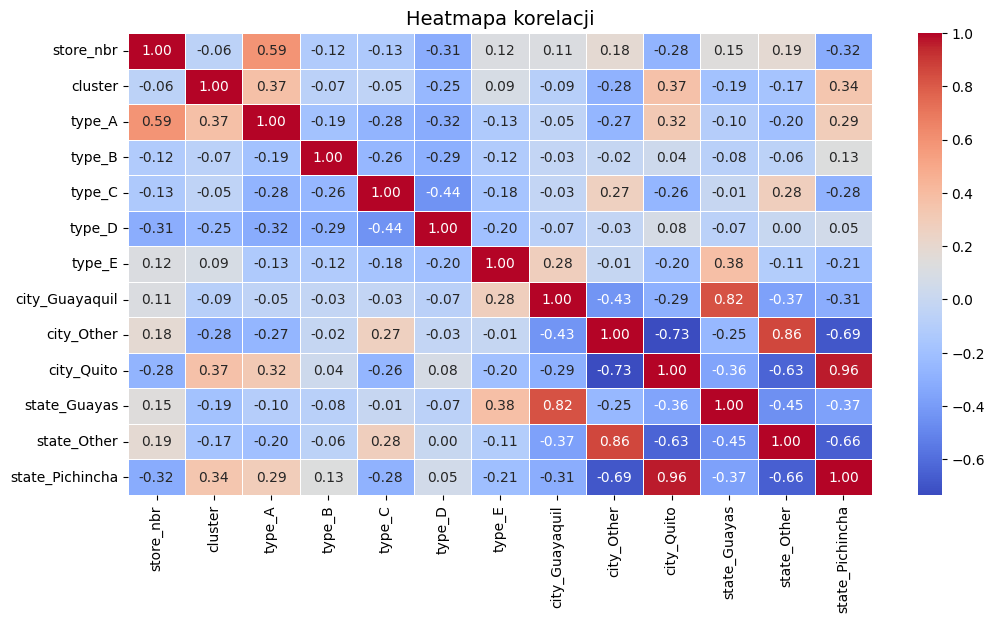

In [ ]:
plot_heatmap(stores)

### ciekawe

- state Guayas - tak E, trochę nie A
- state Other - tak C, nie A, trochę nie A/E
- state Pichincha - tak A, nie C/E, trochę B

- city Guayaquil - tak E
- city Other - tak C, nie A
- city Quito - tak A, nie C/E, trochę D

## oil

Daily oil price. Includes values during both the train and test data timeframe. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
oil.tail()

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [ ]:
oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [ ]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
oil_cpy = oil.copy()

In [ ]:
oil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [ ]:

oil['date'] = pd.to_datetime(oil['date'])
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

In [ ]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear')

In [ ]:
oil.isna().sum()

date          0
dcoilwtico    1
dtype: int64

In [ ]:
oil[oil['dcoilwtico'].isna()]

,date,dcoilwtico
0,2013-01-01,NaN


In [ ]:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')

C:\Users\mcgre\AppData\Local\Temp\ipykernel_18588\1106513338.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')


In [ ]:
oil.isna().sum()

date          0
dcoilwtico    0
dtype: int64

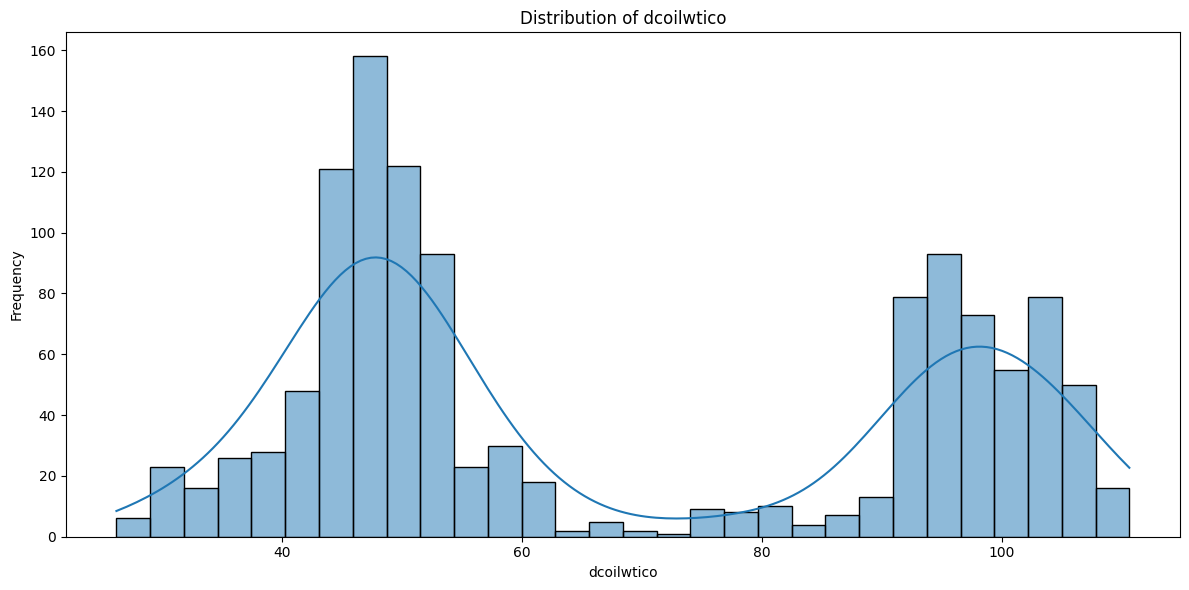

In [ ]:
plot_distribution(oil, 'dcoilwtico')

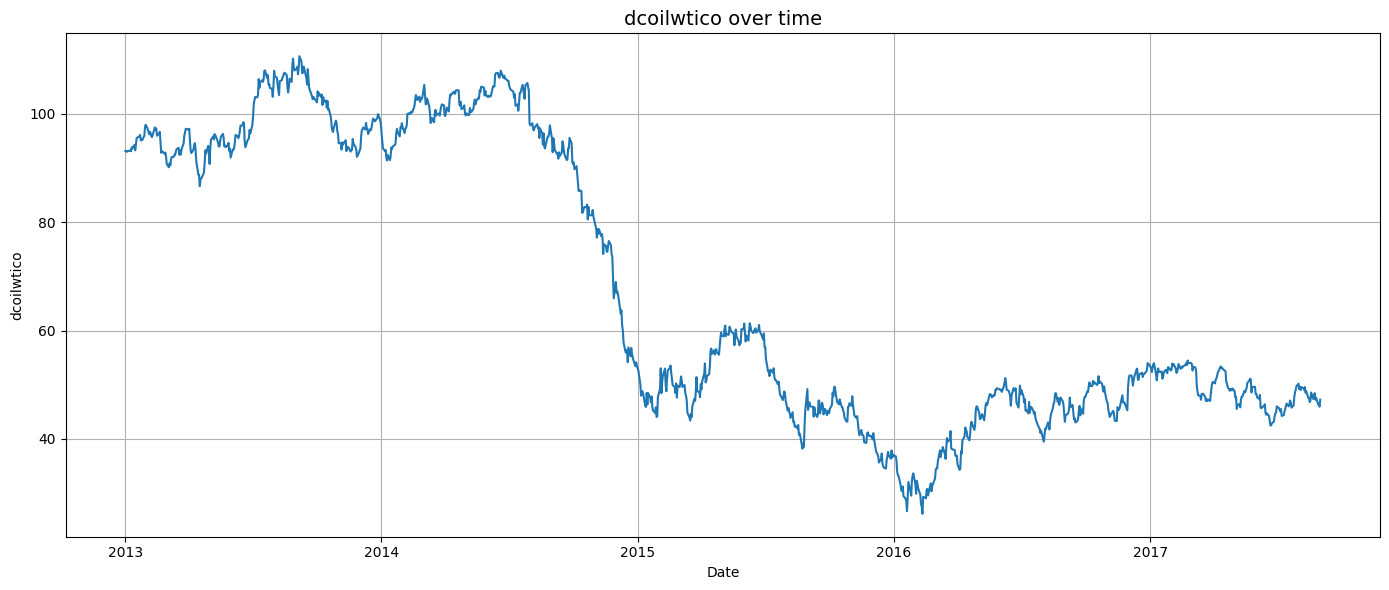

In [ ]:
plot_time_series(oil, 'date', 'dcoilwtico', step=1)

oil wyraźnie potaniał pod koniec 2014 roku z ok. 100 do ok. 50

## transactions

In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [ ]:
transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


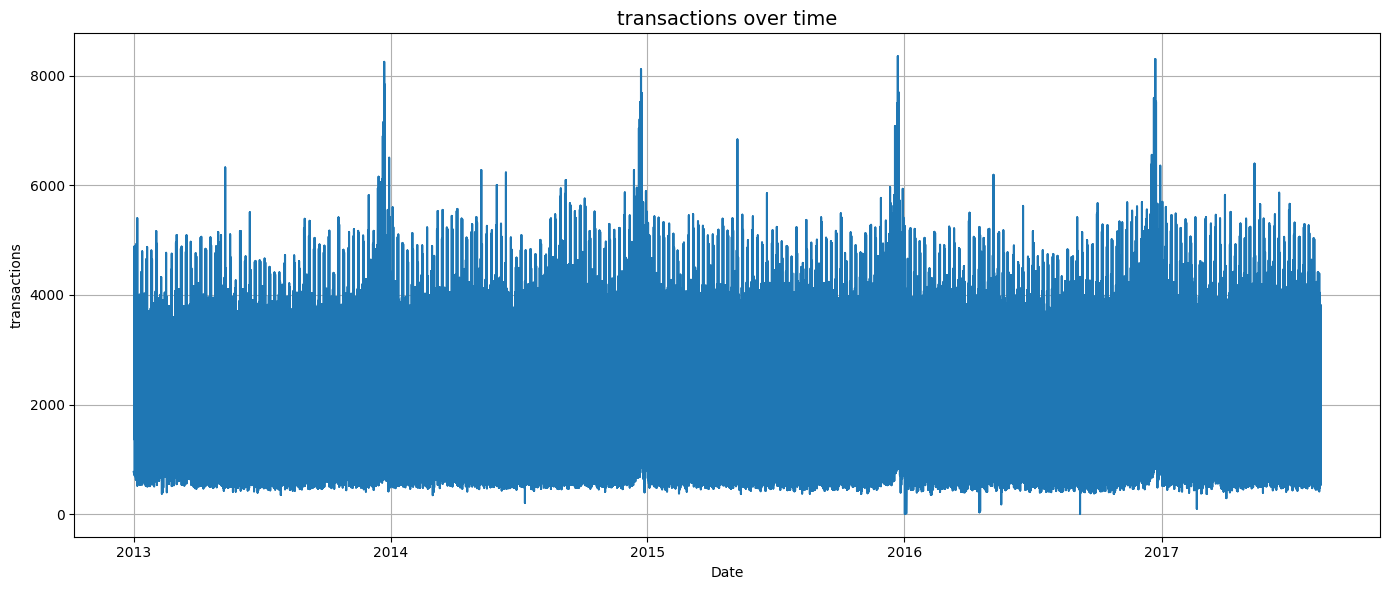

In [ ]:
plot_time_series(transactions, 'date', 'transactions')

Można zauważyć wzrost tranakcji pod koniec roku (Black Friday? Święta?)

## sample submission

In [ ]:
sample_submission

,id,unit_sales
0,125497040,0
1,125497041,0
2,125497042,0
3,125497043,0
4,125497044,0
...,...,...
3370459,128867499,0
3370460,128867500,0
3370461,128867501,0
3370462,128867502,0


In [26]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [27]:
holidays_events[holidays_events['type'] == 'Additional']

,date,type,locale,locale_name,description,transferred
28,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
31,2012-12-21,Additional,National,Ecuador,Navidad-4,False
33,2012-12-22,Additional,National,Ecuador,Navidad-3,False
34,2012-12-23,Additional,National,Ecuador,Navidad-2,False
36,2012-12-24,Additional,National,Ecuador,Navidad-1,False
38,2012-12-26,Additional,National,Ecuador,Navidad+1,False
40,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
53,2013-05-11,Additional,National,Ecuador,Dia de la Madre-1,False
64,2013-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
81,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


In [28]:
holidays_events[holidays_events['type'] == 'Bridge']

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


In [29]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True


In [30]:
holidays_events['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [31]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

date: data (datetime)

scope: N/R/L (National/Regional/Local)

scope_name: nazwa obszaru (Ecuador / prowincja / miasto)

anchor: rdzeń zdarzenia (Navidad, Guayaquil)

role: kategoria roli: (holiday, transfer, bridge, additional, work_day, event)

offset_days: int (np. -4…+4 dla Additional; 0)

transferred: bool (z oryginału; przy holiday mówi, czy przeniesione)

is_day_off: bool (True dla: holiday z transferred=False, transfer, bridge; False dla additional, event, work_day)

year: pomocniczo dla parowania transferów (można odtworzyć z date)

In [32]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


matching z nazwami statów

In [36]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [46]:
holidays_events.head(50)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [16]:
holidays_events[holidays_events['type'] == 'Transfer']

,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


Translado

In [15]:
holidays_events[holidays_events['type'] == 'Bridge']

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


Puente


In [21]:

for type_ in holidays_events['type'].unique():
    print(f"Type: {type_}")
    print(holidays_events[holidays_events['type'] == type_]['description'].values, end="\n\n")

Type: Holiday
['Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion de Riobamba' 'Cantonizacion del Puyo'
 'Cantonizacion de Guaranda' 'Provincializacion de Imbabura'
 'Cantonizacion de Latacunga' 'Fundacion de Machala'
 'Fundacion de Santo Domingo' 'Cantonizacion de El Carmen'
 'Cantonizacion de Cayambe' 'Fundacion de Esmeraldas'
 'Primer Grito de Independencia' 'Fundacion de Riobamba'
 'Fundacion de Ambato' 'Fundacion de Ibarra' 'Cantonizacion de Quevedo'
 'Independencia de Guayaquil' 'Dia de Difuntos' 'Independencia de Cuenca'
 'Provincializacion de Santo Domingo' 'Provincializacion Santa Elena'
 'Independencia de Guaranda' 'Independencia de Latacunga'
 'Independencia de Ambato' 'Fundacion de Quito' 'Fundacion de Loja'
 'Cantonizacion de Salinas' 'Navidad' 'Primer dia del ano' 'Carnaval'
 'Carnaval' 'Fundacion de Manta' 'Provincializacion de Cotopaxi'
 'Fundacion de Cuenca' 'Cantonizacion de Libertad'
 'Cantonizacion

is_day_off
- holiday (transferred=False), transfer, bridge=True.
- additional/event/work_day → False.

In [232]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode

In [ ]:
def preprocess_holidays1111(holidays: pd.DataFrame,
                        stores: pd.DataFrame,
                        items: pd.DataFrame,
                        business_level="city",
                        product_level="family"):
    """
    Preprocessing tabeli holiday_events.

    Parametry:
    - holidays: DataFrame holiday_events.csv
    - stores: DataFrame stores.csv (dla mapowania miasto->state oraz dla business level)
    - items: DataFrame items.csv (dla business level)
    - business_level: 'store_nbr' / 'city' / 'state'
    - product_level: 'item_nbr' / 'class' / 'family'

    Wynikowe kolumny:
    - date: data
    - scope: L=Local, R=Regional, N=National
    - scope_name: nazwa dla scope
    - anchor_label: etykieta święta
    - anchor_key: czysty klucz (ASCII, lower)
    - role: holiday/additional/transfer/bridge/event/work_day
    - offset_days: ile +/- dni od anchor (np. Navidad-1 = -1)
    - city, state: kompatybilne ze stores.csv
    - is_day_off: czy to faktycznie dzień wolny
    - days_from_last_dayoff: ile dni od ostatniego dnia wolnego
    """


    df = holidays.copy()
    df["date"] = pd.to_datetime(df["date"])
    df = df.rename(columns={"locale":"scope", "locale_name":"scope_name"})

    # role/anchor/offset 
    desc = df["description"].fillna("").astype(str).str.strip()

    role = []
    anchor_label = []
    offset = []
    for holiday_type, description_text in zip(df["type"], desc):
        role_value = "other"
        anchor_value = description_text
        offset_value = np.nan

        if holiday_type == "Holiday":
            match = re.match(r"^(.*?)([+-]\d+)$", description_text)
            if match:
                role_value = "additional"
                anchor_value = match.group(1).strip()
                offset_value = int(match.group(2))
            else:
                role_value = "holiday"

        elif holiday_type == "Transfer":
            role_value = "transfer"
            anchor_value = re.sub(r"(?i)^traslado\s+", "", description_text).strip()

        elif holiday_type == "Bridge":
            role_value = "bridge"
            anchor_value = re.sub(r"(?i)^puente\s+", "", description_text).strip()

        elif holiday_type == "Work Day":
            role_value = "work_day"
            anchor_value = re.sub(r"(?i)^recupero\s+puente\s+", "", description_text).strip()

        elif holiday_type == "Additional":
            role_value = "additional"
            match = re.match(r"^(.*?)([+-]\d+)$", description_text)
            if match:
                anchor_value = match.group(1).strip()
                offset_value = int(match.group(2))

        elif holiday_type == "Event":
            role_value = "event"
            match = re.match(r"^(.*?)([+-]\d+)$", description_text)
            if match:
                anchor_value = match.group(1).strip()
                offset_value = int(match.group(2))

        else:
            role_value = holiday_type.lower().replace(" ", "_")

        role.append(role_value)
        anchor_label.append(anchor_value)
        offset.append(offset_value)

    df["role"] = role
    df["anchor_label"] = anchor_label
    df["offset_days"] = offset
    df["anchor_key"] = (df["anchor_label"].fillna("")
                        .map(lambda s: re.sub(r"\s+"," ",unidecode(str(s)).lower().strip())))

    # city/state mapping
    df["city"] = pd.NA
    df["state"] = pd.NA

    city_to_state = stores.drop_duplicates("city").set_index("city")["state"].to_dict()

    mask_L = df["scope"].eq("Local")
    mask_R = df["scope"].eq("Regional")

    # Local -> city
    df.loc[mask_L, "city"] = df.loc[mask_L, "scope_name"]
    df.loc[mask_L, "state"] = df.loc[mask_L, "city"].map(city_to_state)

    # Regional -> state
    df.loc[mask_R, "state"] = df.loc[mask_R, "scope_name"]

    # is_day_off
    df["is_day_off"] = (
        ((df["role"] == "holiday") & (~df["transferred"])) |
        (df["role"] == "transfer") |
        (df["role"] == "bridge")
    )

    # days_from_last_dayoff
    df = df.sort_values("date")
    last = None
    vals = []
    for d,off in zip(df["date"], df["is_day_off"]):
        if last is None: 
            vals.append(np.nan)
        else: 
            vals.append((d-last).days)
        if off:
            last=d

    vals[0] = 0
    df["days_from_last_dayoff"] = vals

    if business_level=="store_nbr":
        df["business_key"] = stores["store_nbr"].unique()[0] 
    elif business_level=="city":
        df["business_key"] = df["city"]
    elif business_level=="state":
        df["business_key"] = df["state"]
    else:
        raise ValueError("business_level musi być: store_nbr/city/state")

    if product_level=="product_nbr":
        df["product_key"] = items["product_nbr"].unique()[0] 
    elif product_level=="family":
        df["product_key"] = items["family"]
    elif product_level=="class":
        df["product_key"] = items["class"]
    else:
        raise ValueError("business_level musi być: store_nbr/city/state")

    cols=["date","scope","scope_name","anchor_label","anchor_key",
          "role","offset_days","city","state","is_day_off","days_from_last_dayoff",
          "business_key","product_key"]
    return df[cols].reset_index(drop=True)

In [ ]:
# hp = preprocess_holidays(holidays_events, stores, items,
#                          business_level="store_nbr",
#                          product_level="family")

# hp.head(60)

,date,scope,scope_name,anchor_label,anchor_key,role,offset_days,city,state,is_day_off,days_from_last_dayoff,business_key,product_key
0,2012-03-02,Local,Manta,Fundacion de Manta,fundacion de manta,holiday,NaN,Manta,Manabi,True,0,1,GROCERY I
1,2012-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi,provincializacion de cotopaxi,holiday,NaN,<NA>,Cotopaxi,True,30,1,GROCERY I
2,2012-04-12,Local,Cuenca,Fundacion de Cuenca,fundacion de cuenca,holiday,NaN,Cuenca,Azuay,True,11,1,CLEANING
3,2012-04-14,Local,Libertad,Cantonizacion de Libertad,cantonizacion de libertad,holiday,NaN,Libertad,Guayas,True,2,1,GROCERY I
4,2012-04-21,Local,Riobamba,Cantonizacion de Riobamba,cantonizacion de riobamba,holiday,NaN,Riobamba,Chimborazo,True,7,1,BREAD/BAKERY
5,2012-05-12,Local,Puyo,Cantonizacion del Puyo,cantonizacion del puyo,holiday,NaN,Puyo,Pastaza,True,21,1,GROCERY I
6,2012-06-23,Local,Guaranda,Cantonizacion de Guaranda,cantonizacion de guaranda,holiday,NaN,Guaranda,Bolivar,True,42,1,GROCERY I
7,2012-06-25,Local,Latacunga,Cantonizacion de Latacunga,cantonizacion de latacunga,holiday,NaN,Latacunga,Cotopaxi,True,2,1,GROCERY I
8,2012-06-25,Local,Machala,Fundacion de Machala,fundacion de machala,holiday,NaN,Machala,El Oro,True,0,1,GROCERY I
9,2012-06-25,Regional,Imbabura,Provincializacion de Imbabura,provincializacion de imbabura,holiday,NaN,<NA>,Imbabura,True,0,1,GROCERY I


In [219]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [221]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [104]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [18]:
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,False
125497036,125497036,2017-08-15,54,2106464,1.0,True
125497037,125497037,2017-08-15,54,2110456,192.0,False
125497038,125497038,2017-08-15,54,2113914,198.0,True


In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
import importlib, holidays_preproc as hp
hp = importlib.reload(hp)

In [15]:
holidays_cpy = holidays_events.copy()

In [16]:
import holidays_preproc as hp

In [149]:
a = ['a', 'b', 'c']
a.extend(['d','e'])
a

['a', 'b', 'c', 'd', 'e']

In [19]:
hp.preprocess(holidays_events).to_csv("po_preproc.csv")

In [ ]:
df = hp.merge_train(train[:10000000], holidays_events, stores)

z:\Repos\Demand-Forecast\DF_wakacyjne_wyzwanie\EDA\holidays_preproc.py:333: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False).any(axis=1)
z:\Repos\Demand-Forecast\DF_wakacyjne_wyzwanie\EDA\holidays_preproc.py:345: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False).any(axis=1)


In [ ]:
df.to_csv("train_holidays.csv")

In [24]:
df

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_holiday,holiday_duration,is_day_off
0,0,2013-01-01,25,103665,7.0,NaN,True,2.0,True
1,1,2013-01-01,25,105574,1.0,NaN,True,2.0,True
2,2,2013-01-01,25,105575,2.0,NaN,True,2.0,True
3,3,2013-01-01,25,108079,1.0,NaN,True,2.0,True
4,4,2013-01-01,25,108701,1.0,NaN,True,2.0,True
...,...,...,...,...,...,...,...,...,...
9999995,9999995,2013-08-21,1,999547,12.0,NaN,False,0.0,False
9999996,9999996,2013-08-21,1,1001305,3.0,NaN,False,0.0,False
9999997,9999997,2013-08-21,1,1004550,15.0,NaN,False,0.0,False
9999998,9999998,2013-08-21,1,1004551,25.0,NaN,False,0.0,False


In [25]:
df['holiday_duration'].value_counts()

holiday_duration
0.0    9540406
1.0     272389
2.0     144671
6.0      42534
Name: count, dtype: int64

In [31]:
train[10000000:100000000]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
10000000,10000000,2013-08-21,1,1009539,4.0,NaN
10000001,10000001,2013-08-21,1,1009997,3.0,NaN
10000002,10000002,2013-08-21,1,1009998,2.0,NaN
10000003,10000003,2013-08-21,1,1010752,3.0,NaN
10000004,10000004,2013-08-21,1,1010757,2.0,NaN
...,...,...,...,...,...,...
99999995,99999995,2016-12-15,18,1047758,8.0,True
99999996,99999996,2016-12-15,18,1047772,5.0,False
99999997,99999997,2016-12-15,18,1047773,7.0,False
99999998,99999998,2016-12-15,18,1047774,6.0,False


In [52]:
a = 76850000
df2 = hp.merge_train(train[-100000000:], holidays_events, stores)

MemoryError: Unable to allocate 766. MiB for an array with shape (1, 100383258) and data type float64

In [50]:
df2

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,is_holiday,holiday_duration,is_day_off,is_event
0,124497040,2017-08-06,19,2040862,4.0,False,False,0.0,False,False
1,124497041,2017-08-06,19,2042436,50.0,False,False,0.0,False,False
2,124497042,2017-08-06,19,2042941,44.0,False,False,0.0,False,False
3,124497043,2017-08-06,19,2042947,30.0,False,False,0.0,False,False
4,124497044,2017-08-06,19,2043795,1.0,False,False,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...
999995,125497035,2017-08-15,54,2089339,4.0,False,False,0.0,False,False
999996,125497036,2017-08-15,54,2106464,1.0,True,False,0.0,False,False
999997,125497037,2017-08-15,54,2110456,192.0,False,False,0.0,False,False
999998,125497038,2017-08-15,54,2113914,198.0,True,False,0.0,False,False


In [51]:
df2['is_event'].value_counts()

is_event
False    1000000
Name: count, dtype: int64

In [37]:
a = 76850000
train[a:a+1]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
76850000,76850000,2016-04-20,24,463598,11.0,False
